# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#setting float display format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Project 1 - Foodhub(FINAL)/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape

(1898, 9)

#### Observations:
The Dataframe has 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
All the columns have 1898 observations, indicating the absence of missing values.

The columns `order_id`, `customer_id`, `food_preparation_time` and `delivery_time` are of integer type.

The `cost_of_the_order` column is of float type and the other columns are of object type.

The memory usage of this Dataframe is 133.6 KB

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in this Data.

Also, as seen from the first 5 rows, the orders without a rating have their `rating` attribute as "Not given"


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
The minimum food preparation time is 20 minutes.

On average, it takes 27.37 (~27) minutes for food to be prepared.

And the maximum time recorded is 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
736 orders were not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

###**Observations** **on order_id**

In [ ]:
df['order_id'].nunique()

1898

There are 1898 unique orders

###**Observations on customer_id**

In [ ]:
df['customer_id'].nunique()

1200

There are 1200 unique customer IDs indicating that some customers have multiple orders

###**Observations on Restaurants**

In [ ]:
df['restaurant_name'].nunique()

178

There are 178 restaurants in this dataset

###**Observations on cuisine types**

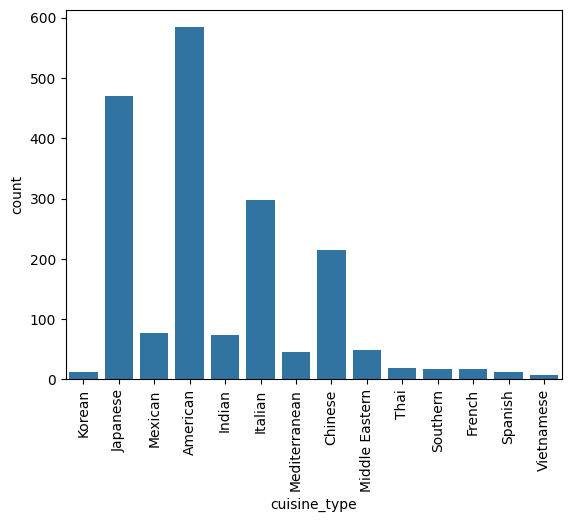

In [ ]:
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

There are 14 cuisine types in this dataset

The most popular cuisines are American, Japanese, Italian and Chinese

### **Observations on cost of orders**

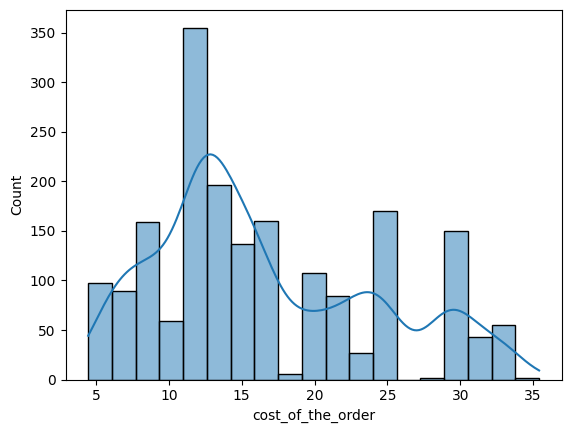

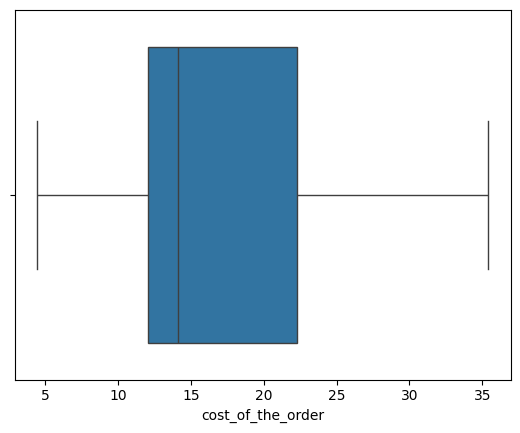

In [ ]:
sns.histplot(data=df, x = 'cost_of_the_order', kde=True)
plt.show()
sns.boxplot(data=df, x = 'cost_of_the_order')
plt.show()





*  There are no outliers in this data
*  The distribution is right skewed
*  Most of the orders cost between 10-15 dollars


### **Observations on Food Preparation time**



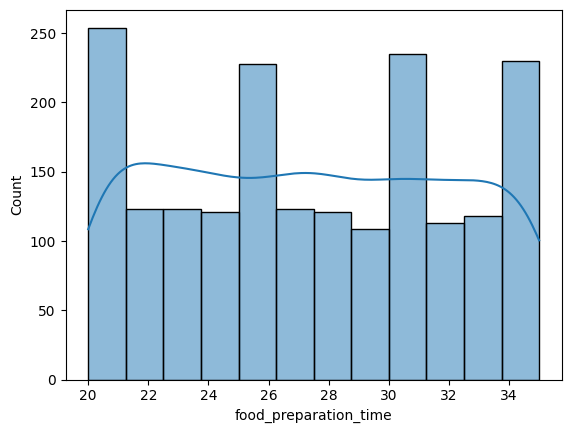

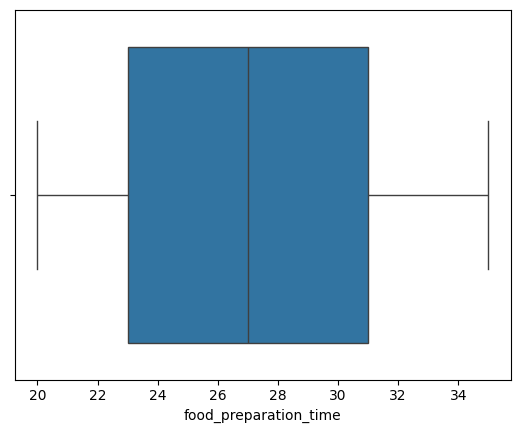

In [ ]:
sns.histplot(data=df, x = 'food_preparation_time', kde=True)
plt.show()
sns.boxplot(data=df, x = 'food_preparation_time')
plt.show()



*   There are no outliers in this data
*   The distribution is multi-modal



### Observations on Delivery time

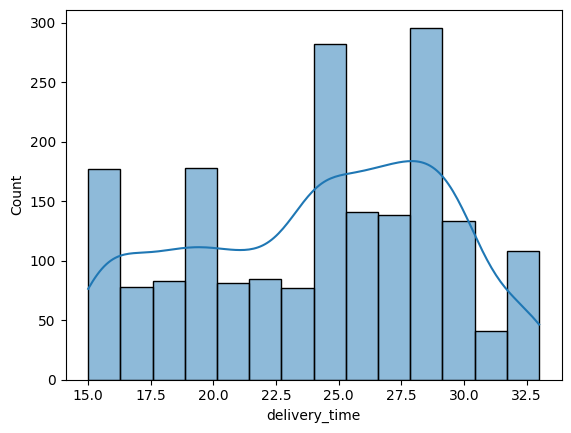

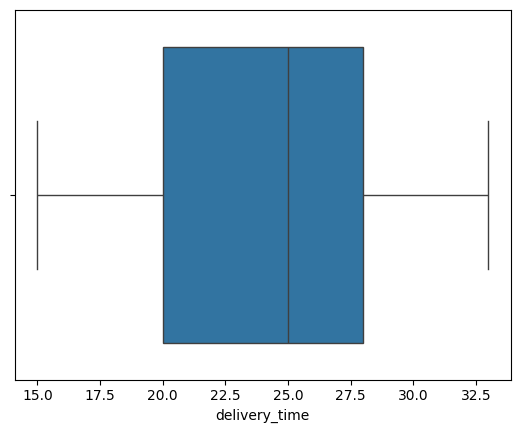

In [ ]:
sns.histplot(data=df, x = 'delivery_time', kde=True)
plt.show()
sns.boxplot(data=df, x = 'delivery_time')
plt.show()



*  There are no outliers in this data
*  The distribution is also multi-modal



### Observations on Day of the week

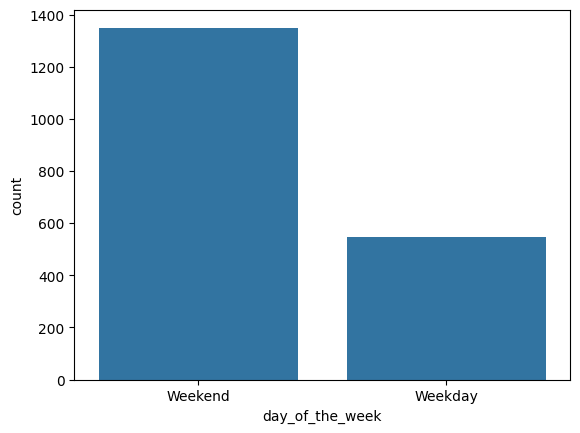

In [ ]:
sns.countplot(data=df, x='day_of_the_week')
plt.show()

The number of orders placed are more on weekends than weekdays

### Observations on Rating

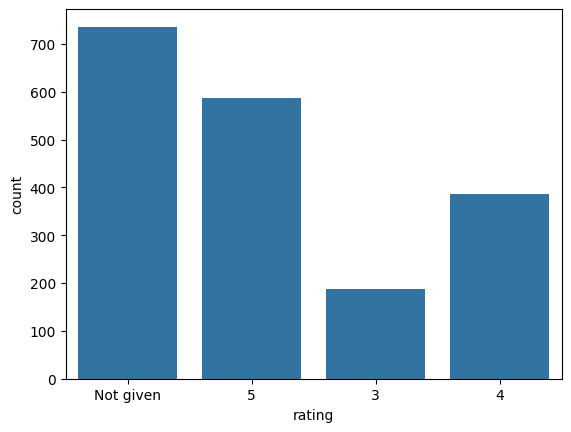

In [ ]:
sns.countplot(data=df, x='rating')
plt.show()




*   The orders that were not rated by the customers are highest in number.
*   Among the rated orders, most are rated a "5"



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
The top 5 restaurants are:
*   Shake Shack
*   The Meatball Shop
*   Blue Ribbon Sushi
*   Blue Ribbon Fried Chicken
*   Parm





### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

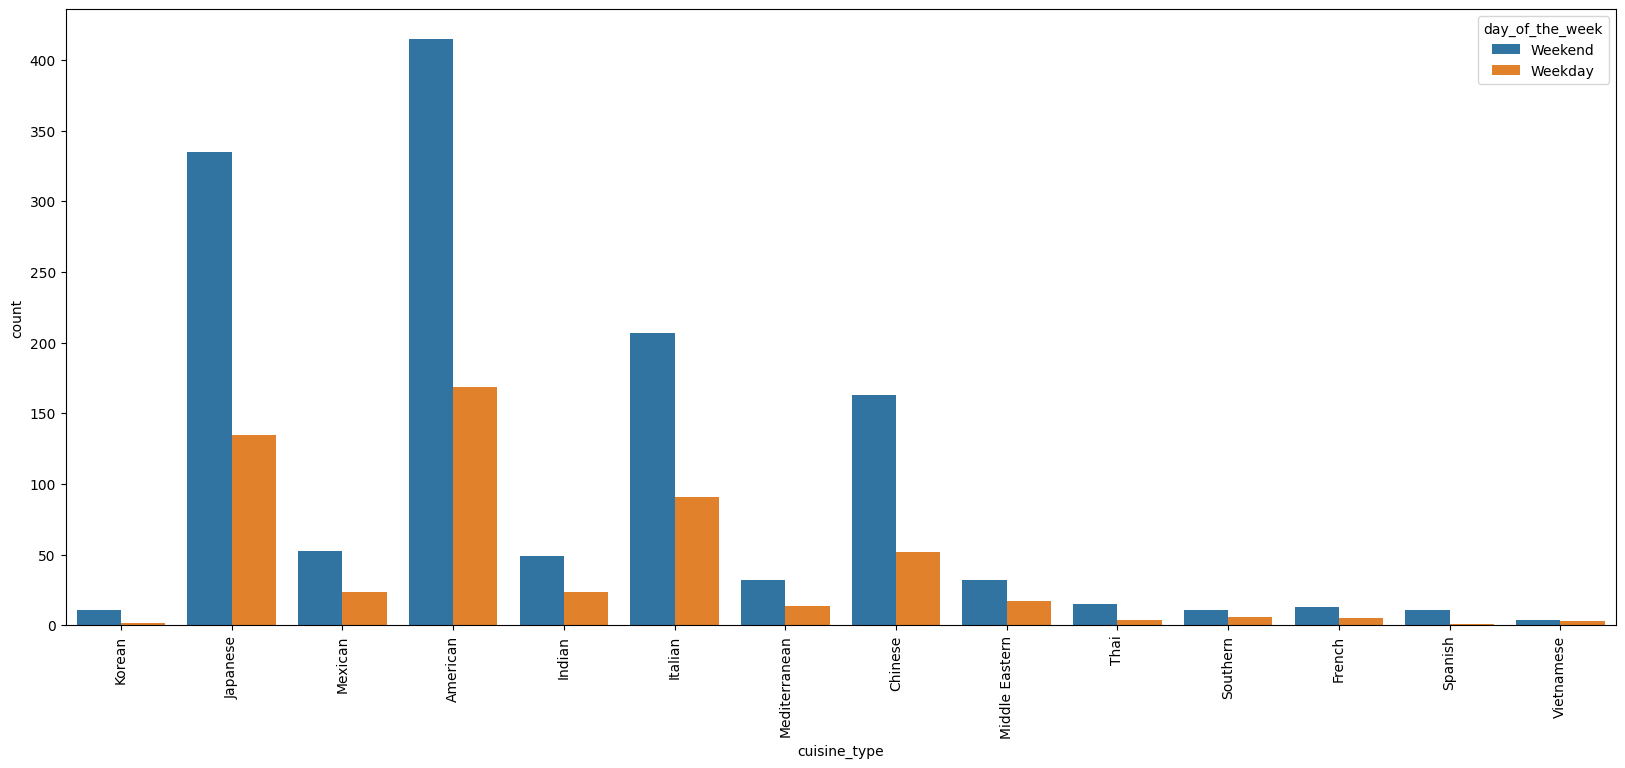

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x= 'cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### Observations:
American cuisine is most popular on weekends


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# using value_counts method to get number of orders > 20 dollars, dividing by total number of observations multiplied by 100
((df['cost_of_the_order'] > 20).value_counts() / df.shape[0]) * 100

False   70.76
True    29.24
Name: cost_of_the_order, dtype: float64

#### Observations:
29.24% (~29) of the orders cost more than 20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean delivery time is ~24 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
#using the nlargest method to return the top 3
df['customer_id'].value_counts().nlargest(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
Customer 52832 placed 13 orders

Customer 47440 placed 10 orders

Customer 83287 placed 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Cuisine vs cost of orders

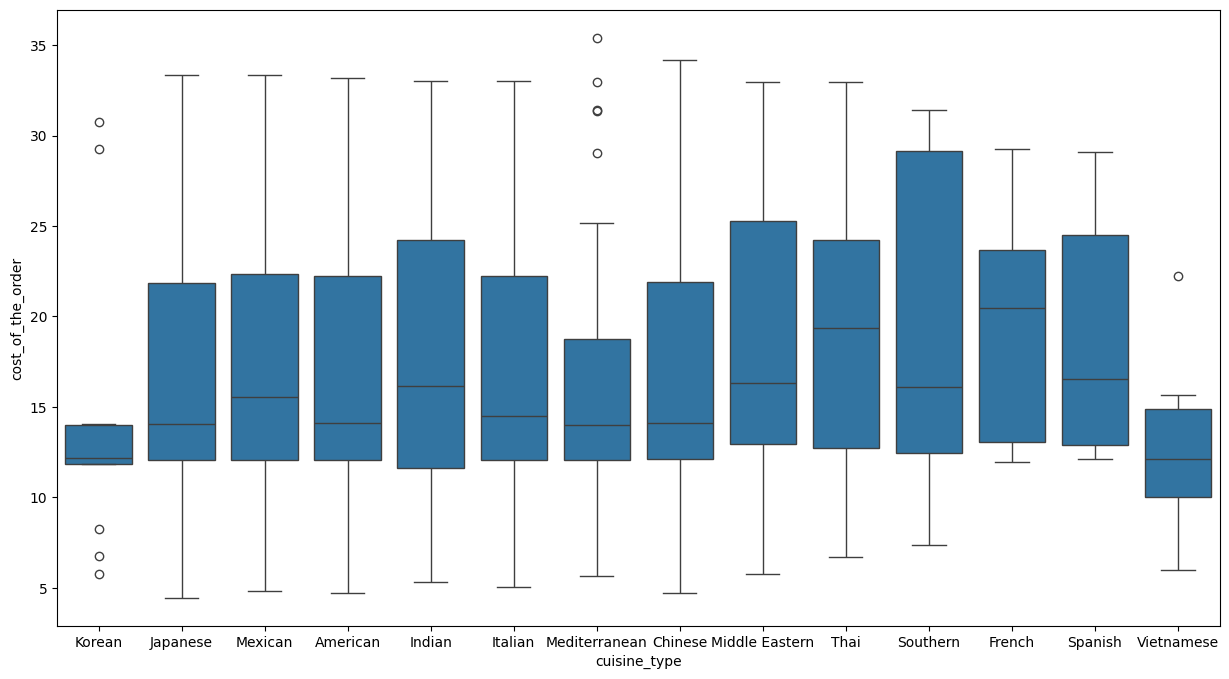

In [ ]:
# Write the code here
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xlabel('cuisine_type')
plt.ylabel('cost_of_the_order')
plt.show()


*   The median costs of all the cuisines are above 10 dollars with a few outliers present for the Korean, Mediterranean and Vietnamese cuisines.
*   French cuisine has the highest median cost at about 20 dollars
*   Mediterranean cuisine has the most expensive order





### Cuisine vs Preparation time

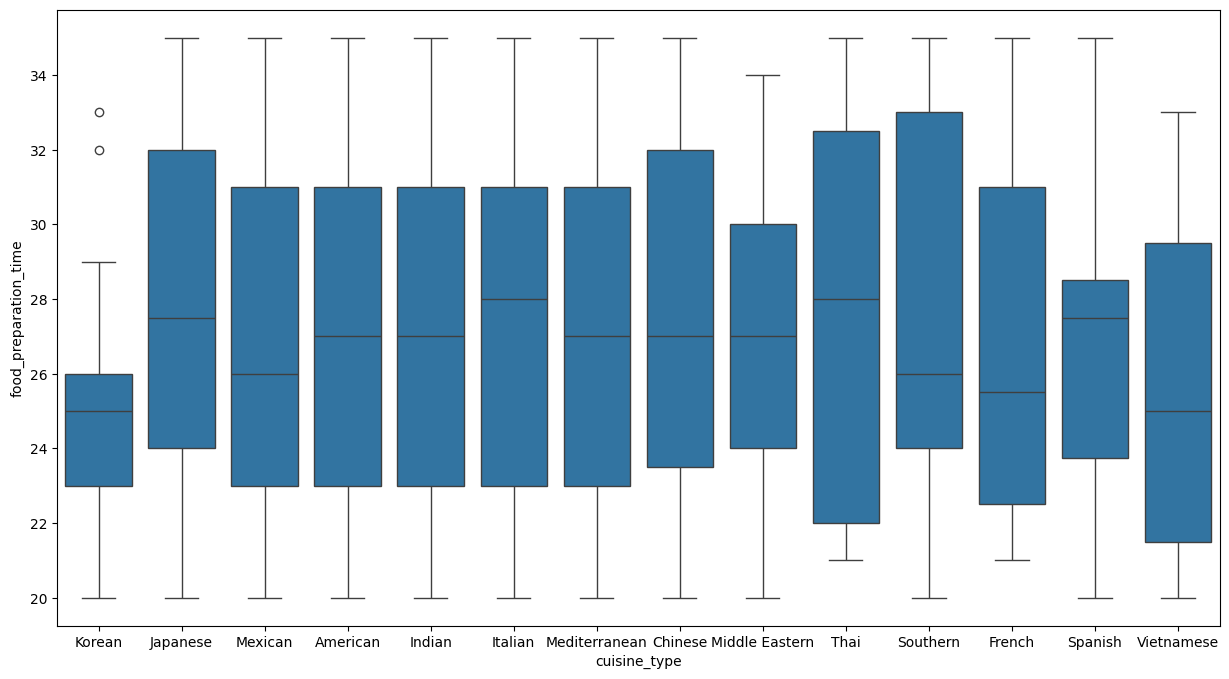

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xlabel('cuisine_type')
plt.ylabel('food_preparation_time')
plt.show()

Observations



*   The median food preparation time for all cuisines are above 24 minutes.

*   Italian and Thai cuisines have the highest medians at about 28 minutes

*   Korean cuisine has a few outliers





### Cuisine vs delivery time

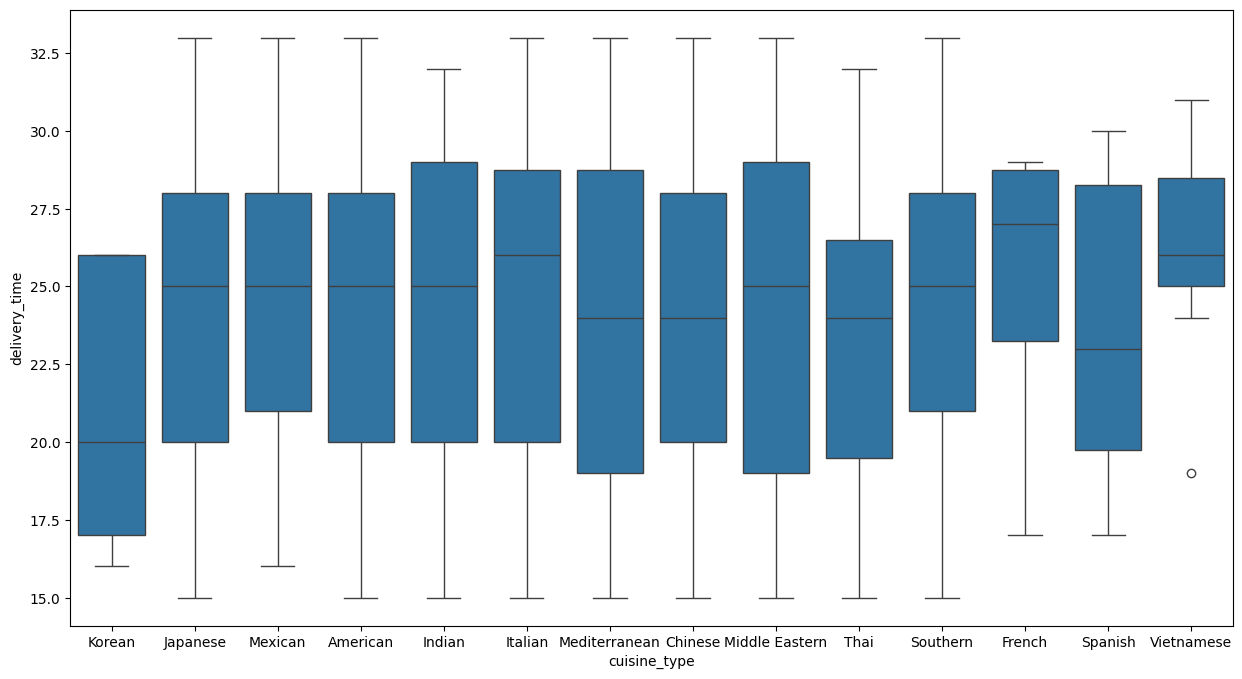

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='cuisine_type', y='delivery_time')
plt.xlabel('cuisine_type')
plt.ylabel('delivery_time')
plt.show()

Observation

Most cuisines have their median delivery time at about 25 minutes


### Delivery time vs Day of the week

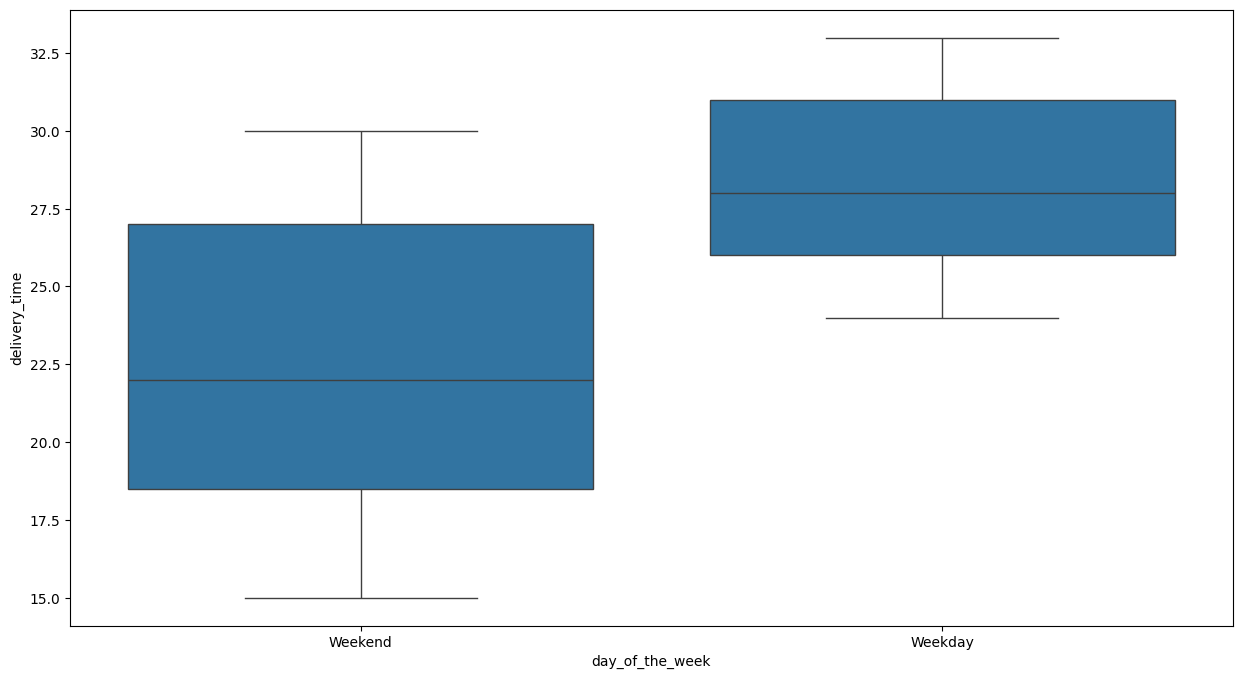

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.xlabel('day_of_the_week')
plt.ylabel('delivery_time')
plt.show()

The median delivery time for weekends is about 22 minutes while for weekdays is about 28 minutes

###Cost of orders vs Day of the week

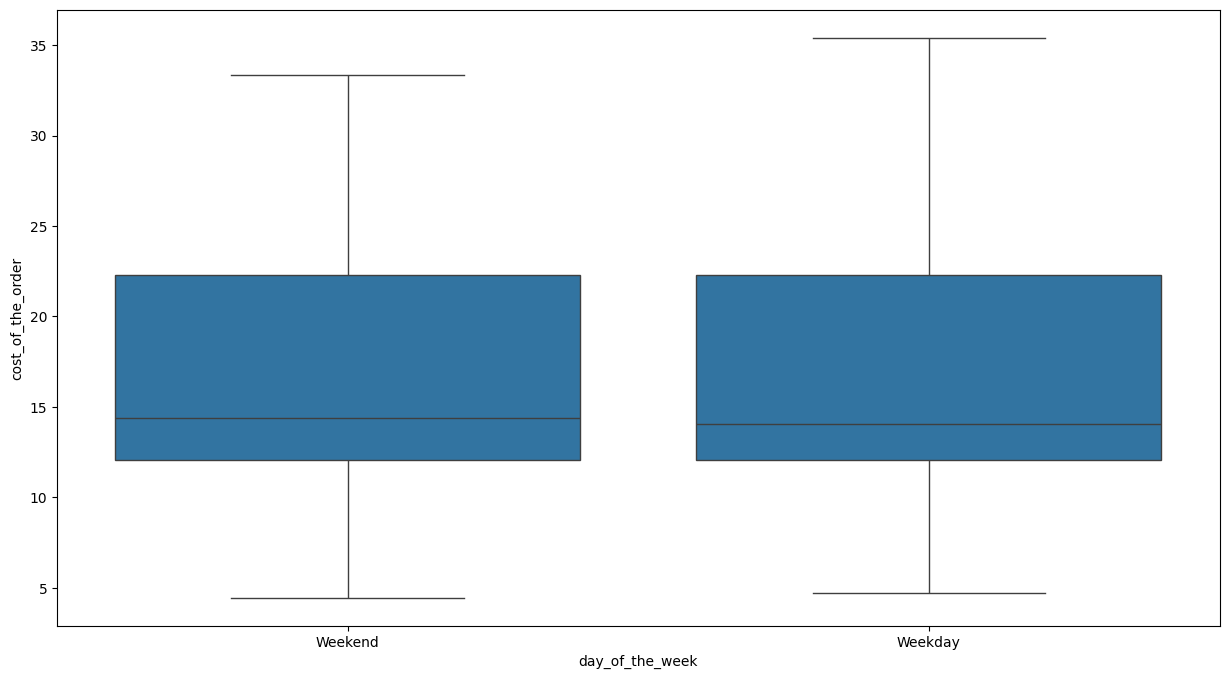

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order')
plt.xlabel('day_of_the_week')
plt.ylabel('cost_of_the_order')
plt.show()

The median cost of orders on weekend and weekdays are both about 15 dollars each

### Rating vs Cost of orders

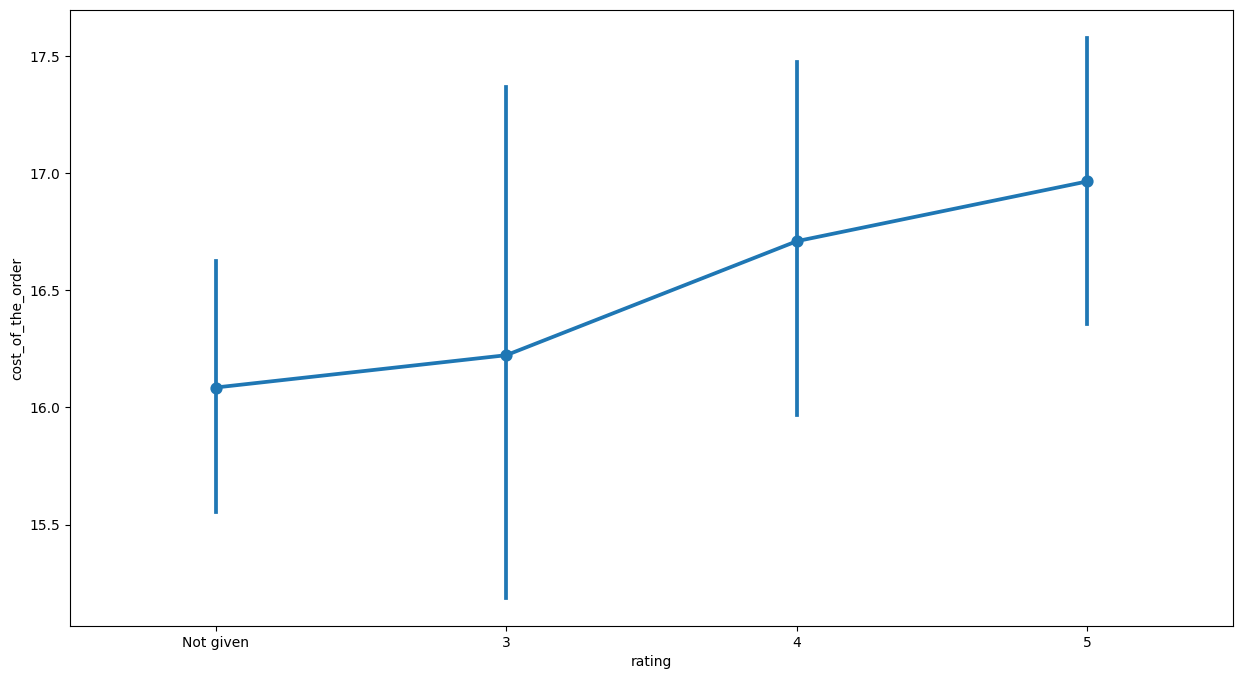

In [ ]:
plt.figure(figsize=(15,8))
sns.pointplot(data=df, x='rating', y='cost_of_the_order', order=['Not given', '3', '4', '5'])
plt.xlabel('rating')
plt.ylabel('cost_of_the_order')
plt.show()

Observation

This shows that on average the higher the cost of the order, the higher it will be rated

### Rating vs Food preparation time

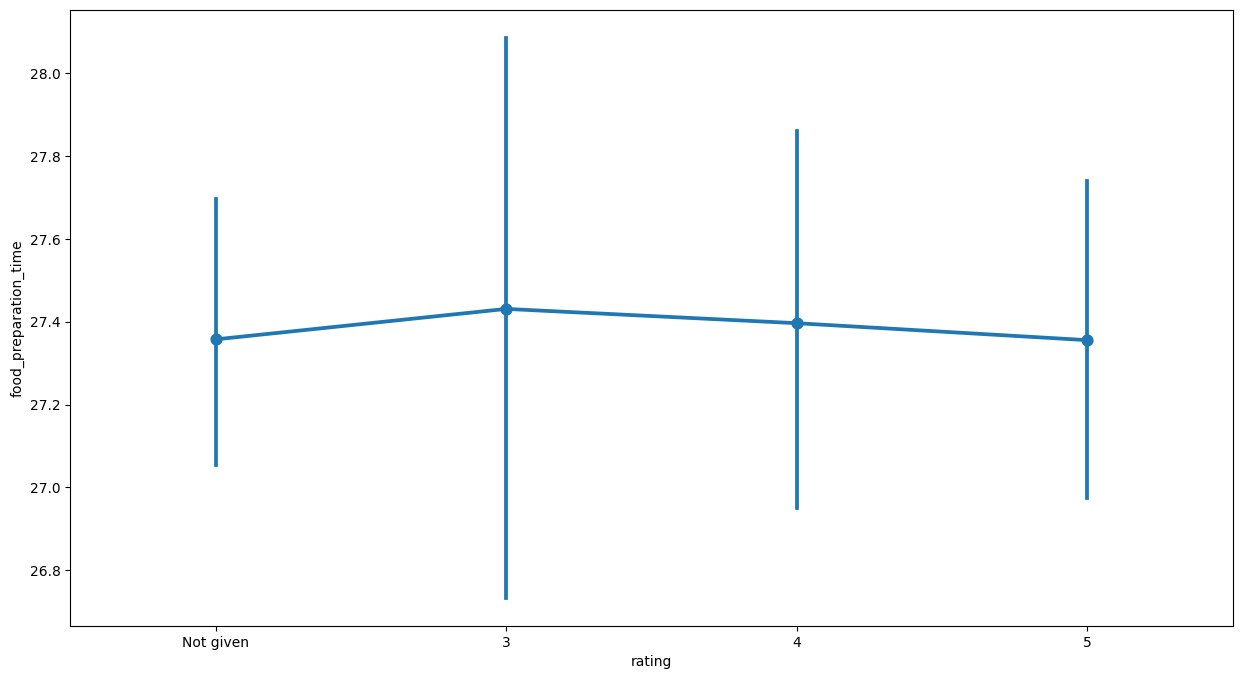

In [ ]:
plt.figure(figsize=(15,8))
sns.pointplot(data=df, x='rating', y='food_preparation_time', order=['Not given', '3', '4', '5'])
plt.xlabel('rating')
plt.ylabel('food_preparation_time')
plt.show()

Observation

On average, orders rated "3" have the longest food preparation time.
Excluding the unrated orders, The average food preparation time decreases slightly as the rating increases.

###Rating vs Delivery *Time*

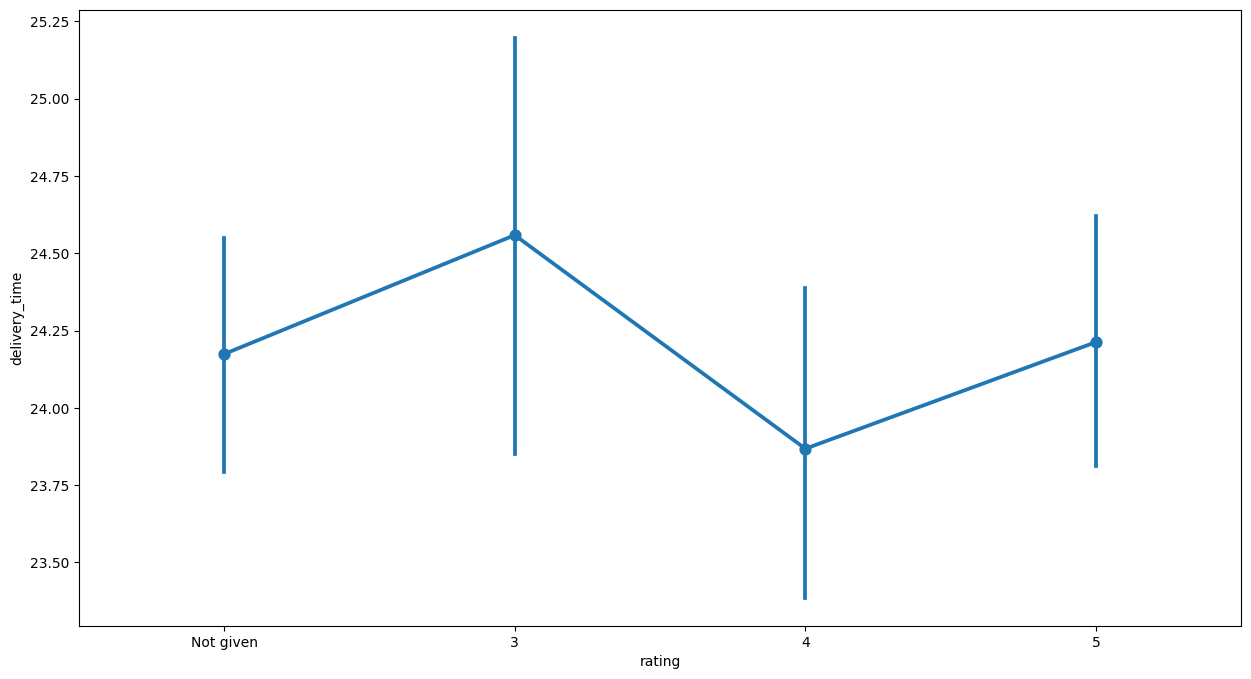

In [ ]:
plt.figure(figsize=(15,8))
sns.pointplot(data=df, x='rating', y='delivery_time',order=['Not given', '3', '4', '5'])
plt.xlabel('rating')
plt.ylabel('delivery_time')
plt.show()

Observation

Orders rated "3" have the highest mean delivery time and orders rated "4" have the least mean delivery time.

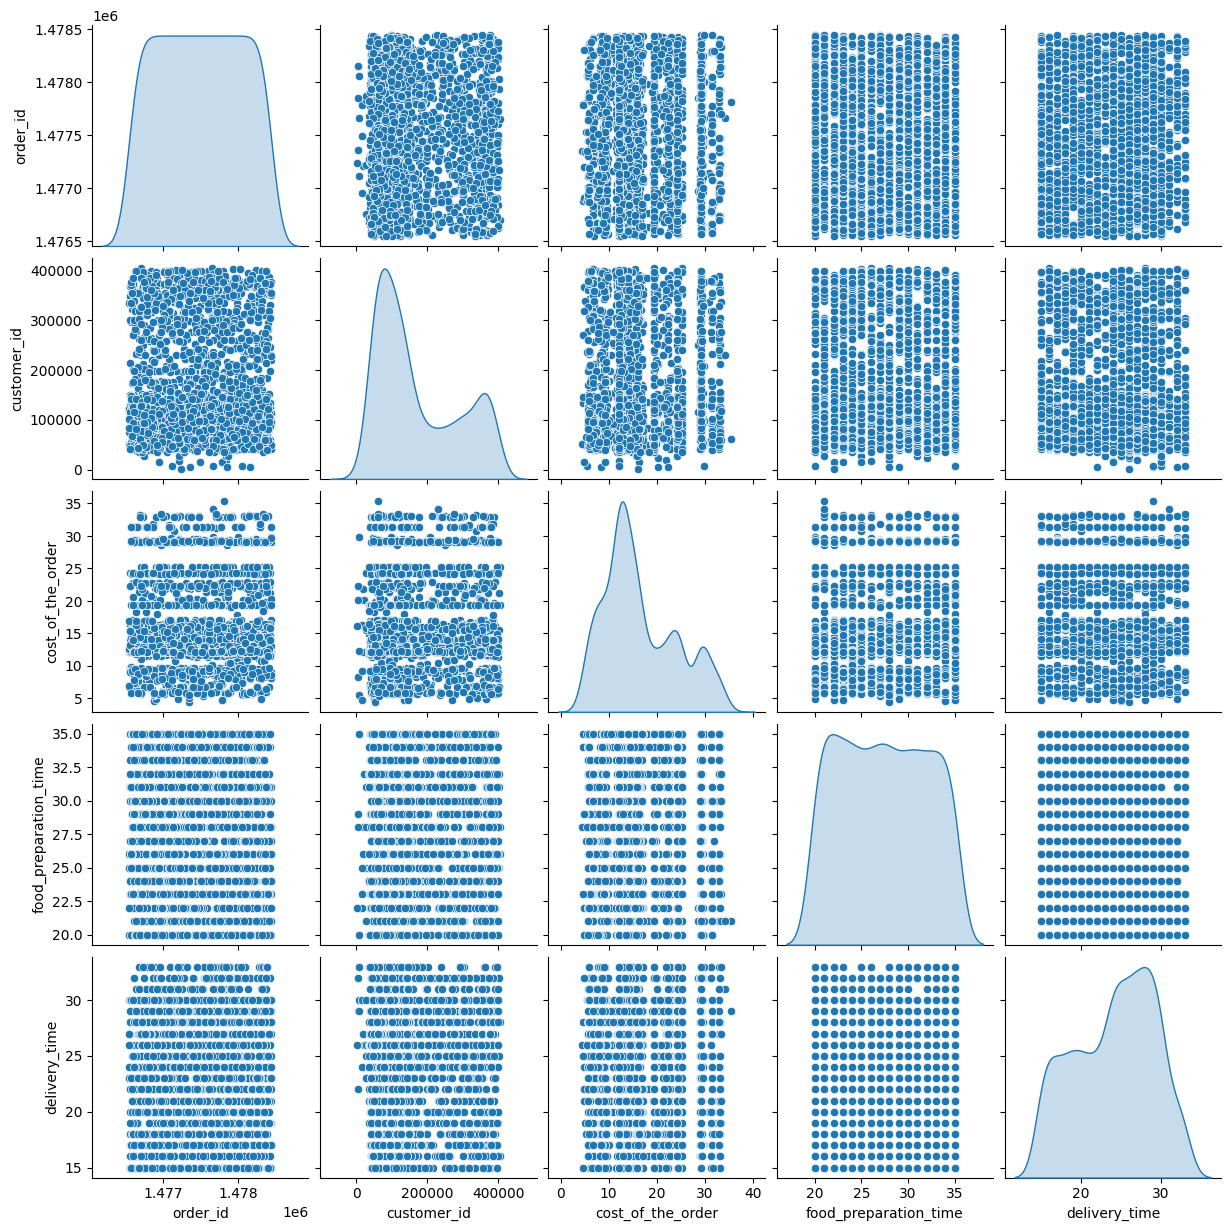

In [ ]:
sns.pairplot(df, diag_kind='kde')

### Correlation

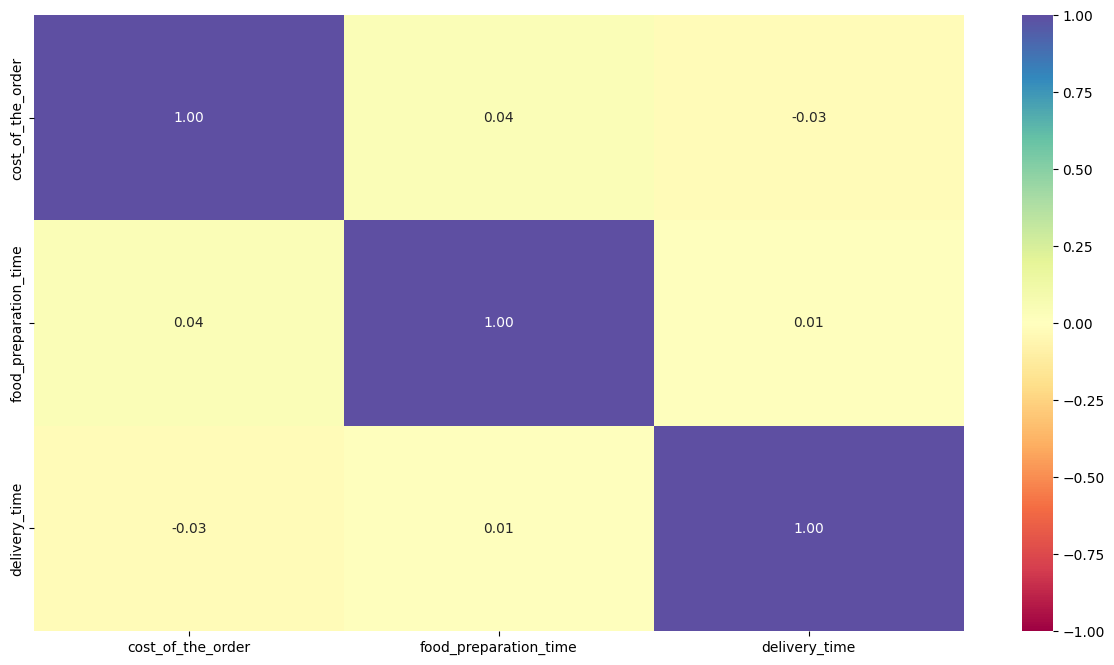

In [ ]:
num_var = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
corr = df[num_var].corr()
#heatmap

plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')
plt.show()

The numerical columns in the dataset have negligible correlation with each other

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#creating a copy of the data frame to avoid making changes to the original dataframe
df_copy = df.copy()

In [ ]:
df_copy.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
#replacing the "Not given" ratings with nan
df_copy['rating'] = df_copy['rating'].replace(['Not given'], np.nan)

In [ ]:
#checking the changes
df_copy.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
#changing the data type of the rating column
df_copy['rating'] = df_copy['rating'].astype(float)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [ ]:
#getting the rating count for each restaurant
rating_count = df_copy.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
rating_count


,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
...,...,...
173,Market Table,0
174,Paul & Jimmy's,0
175,Room Service,0
176,Rohm Thai,0


In [ ]:
#renaming the rating column to rating_count
rating_count.rename(columns={'rating':'rating_count'}, inplace=True)

In [ ]:
rating_count.head(3)

,restaurant_name,rating_count
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73


In [ ]:
#getting the average rating for each restaurant
avg_rating = df_copy.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()
avg_rating

,restaurant_name,rating
0,'wichcraft,5.00
1,Ravagh Persian Grill,5.00
2,Chola Eclectic Indian Cuisine,5.00
3,Chote Nawab,5.00
4,Junoon,5.00
...,...,...
173,Rohm Thai,NaN
174,Room Service,NaN
175,Spice Thai,NaN
176,Tarallucci e Vino Restaurant,NaN


In [ ]:
#renaming the rating column to avg_rating
avg_rating.rename(columns={'rating':'avg_rating'}, inplace=True)

In [ ]:
avg_rating.head(3)

,restaurant_name,avg_rating
0,'wichcraft,5.00
1,Ravagh Persian Grill,5.00
2,Chola Eclectic Indian Cuisine,5.00


In [ ]:
#merging the rating_count and avg_rating tables
ratings_merged = rating_count.merge(avg_rating, on = 'restaurant_name', how = 'outer')
ratings_merged.head(10)

,restaurant_name,rating_count,avg_rating
0,Shake Shack,133,4.28
1,The Meatball Shop,84,4.51
2,Blue Ribbon Sushi,73,4.22
3,Blue Ribbon Fried Chicken,64,4.33
4,RedFarm Broadway,41,4.24
5,Parm,39,4.13
6,RedFarm Hudson,34,4.18
7,TAO,28,4.36
8,Rubirosa,24,4.12
9,Han Dynasty,23,4.43


#### Observations:
The restaurants with a **rating count of more than 50 AND average rating greater than 4** are:


*   Shake Shack
*   The Meatball Shop
*   Blue Ribbon Sushi
*   Blue Ribbon Fried Chicken




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#A function to calculate revenue on each order
def calc_rev (row):
    '''
    This function calculate the charges
    on orders greater than 20 dollars (25%)
    and orders greater than 5 dollars (15%)
    '''
    if row > 20:
        return row * 0.25
    elif row > 5:
        return row * 0.15
    else:
        return row * 0

In [ ]:
#apply the function to the cost of order column
df_copy['Revenue'] = df_copy['cost_of_the_order'].apply(calc_rev)

In [ ]:
df_copy.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.69
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.81
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.00,23,28,1.83
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.00,25,15,7.30
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.00,25,24,1.74


In [ ]:
net_revenue = df_copy['Revenue'].sum()
net_revenue

6166.303

Observations

The net revenue generated is about 6166.3 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#Creating a new column for the total time
df_copy['total_time'] = df_copy['food_preparation_time'] + df_copy['delivery_time']

In [ ]:
df_copy.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.69,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.81,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.00,23,28,1.83,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.00,25,15,7.30,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.00,25,24,1.74,49


In [ ]:
# using value_counts method to get number of orders delivered in more than 60 minutes, dividing by total number of observations multiplied by 100
((df_copy['total_time'] > 60).value_counts() / df_copy.shape[0]) * 100

False   89.46
True    10.54
Name: total_time, dtype: float64

#### Observations

10.54% of orders take longer than 60 minutes to be delivered from the time the order is placed

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
#grouping by the day of the week and applying the mean() function
df_copy.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday   28.34
Weekend   22.47
Name: delivery_time, dtype: float64

#### Observations:
The mean delivery time on weekdays is around 28 minutes while the mean delivery time on weekends is about 22 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The cost of orders ranges between ~ 4.5 dollars to 35 dollars. The average cost is about 16.5 dollars
and half of the costs are less than 14 dollars
*   Food preparation time ranges between 20 minutes to 35 minutes. The average time to prepare food is ~27 minutes.
50% of orders are prepared in less than 27 minutes.
*  Delivery time ranges between 15 minutes to 33 minutes. Mean delivery time is ~24 minutes. 50% of orders are delivered in less than 25 minutes
*  About 38% of the orders were not rated. Among the rated orders, 50% were rated a '5'
* The most popular cuisines are American, Japanese, Italian and Chinese cuisines
*   More orders are placed on weekends
*   The top 5 restaurants with the most orders are:
 Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm
*   The median cost of orders for all cuisines are above 10 dollars. French cuisine has the highest median cost of about 20 dollars. The most expensive order in the data set was made for Mediterranean cuisine.
*   The median delivery time for weekends is about 22 minutes while for weekdays is about 28 minutes
*  The median cost of orders on weekends and weekdays are about 15 dollars each
*  On average, the higher the costs, the higher the order is rated.
*   Excluding the unrated orders, The average food preparation time decreases slightly as the rating increases.
*  Orders rated "3" have the highest mean delivery time and orders rated "4" have the least mean delivery time.
*   The correlation among cost, delivery time and food preparation time is negligible.
















### Recommendations:

*  The company should focus on the most popular cuisines (American, Japanese, Italian and Chinese) as they contribute the bulk of their revenue.
*   Since more orders are placed on weekends, special weekend promos could increase the companies revenue
*   The company should also place focus on the top restaurants with higher average rating and rating count and encourage more orders with their customers
*   Discounts could be given on higher order prices to encourage more orders
*   Promotions on holidays relevant to each cuisine type could drive more sales



---